---
### Recipe Similarity Match
reference: https://markhneedham.com/blog/2016/07/27/scitkit-learn-tfidf-and-cosine-similarity-for-computer-science-papers/

---

In [1]:
#Import Dependencies
import numpy as np
import pandas as pd
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
!ls

Recipe Similarity Match.ipynb data
Text Cleaning                 fuzzy_string_matching.ipynb


In [3]:
df = pd.read_csv('data/recipe_list.csv')
df.head()

,directions,id,ingredients,recipe_name,scraped_tags,text_combination
0,Preheat oven to 350 degrees (175 degrees C). L...,5c5177b4b0d73530ac82d6c8,all-purpose flour 1/2 teaspoons baking soda 1/...,Chocolate Mayo Cake,chocolate-cake desserts cakes,Preheat oven to 350 degrees (175 degrees C). L...
1,Preheat oven to 350 degrees F (175 degrees C)....,5c5177b4b0d73530ac82d6c9,raisins water eggs liquid sweetener vegetable ...,Sugar Free Cake,spice-cake desserts cakes,Preheat oven to 350 degrees F (175 degrees C)....
2,Preheat oven to 350 degrees F (175 degrees C)....,5c5177b4b0d73530ac82d6ca,mayonnaise white sugar water all-purpose flour...,Mayonnaise Cake,chocolate-cake desserts cakes,Preheat oven to 350 degrees F (175 degrees C)....
3,Remove skin and bones from fish. In a medium b...,5c5177b4b0d73530ac82d6cb,"(15 ounce) can mackerel, drained and rinsed sm...",Mackerel Dip,appetizers-and-snacks seafood,Remove skin and bones from fish. In a medium b...
4,Preheat oven to 350 degrees F (175 degrees C)....,5c5177b4b0d73530ac82d6cc,white sugar shortening ground cinnamon ground ...,Eggless Milkless Butterless Cake,spice-cake desserts cakes,Preheat oven to 350 degrees F (175 degrees C)....


---
#### Data Cleaning: Removing Unnecessary Characters

In [4]:
docs = df['text_combination'].dropna().str.replace('-' , '').str.lower().str.replace('[^a-zA-Z ]' , '')
docs.head()

0    preheat oven to  degrees  degrees c lightly gr...
1    preheat oven to  degrees f  degrees c grease a...
2    preheat oven to  degrees f  degrees c grease a...
3    remove skin and bones from fish in a medium bo...
4    preheat oven to  degrees f  degrees c lightly ...
Name: text_combination, dtype: object

----
#### Data Analysis using Wordcloud:

In [5]:
stopwords = nltk.corpus.stopwords.words('english')

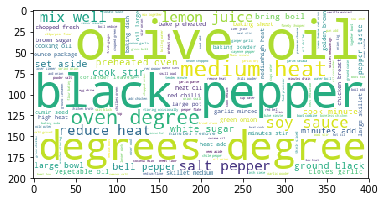

In [6]:
WC_Neutral = WordCloud(background_color = 'white' , stopwords = stopwords).generate('' .join(docs))
plt.imshow(WC_Neutral)

In [7]:
# Adding more words to stopwwords based on wordcloud
extra_stopwords = ['medium', 'heat', 'degree', 'degrees', 'reduce', 'heat', 'preheated', 'cook', 'minute']

In [8]:
stopwords.extend(extra_stopwords)

---
#### Data Cleaning:
- Removing Stopwords
- Stemming to root form
- Producing clean dataset

In [9]:
docs.head()

0    preheat oven to  degrees  degrees c lightly gr...
1    preheat oven to  degrees f  degrees c grease a...
2    preheat oven to  degrees f  degrees c grease a...
3    remove skin and bones from fish in a medium bo...
4    preheat oven to  degrees f  degrees c lightly ...
Name: text_combination, dtype: object

In [10]:
print(f'Total number of recipes in dataset: {len(docs)}')

Total number of recipes in dataset: 19774


In [11]:
# Choosing porter stemmer
stemmer = nltk.stem.PorterStemmer()

In [12]:
def clean_sentence(doc):
    words = doc.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    doc_clean = ' '.join(words_clean)
    return doc_clean

In [13]:
docs.apply(clean_sentence)

0        preheat oven   c lightli greas two  inch layer...
1        preheat oven  f  c greas flour one  inch bundt...
2        preheat oven  f  c greas flour two   inch roun...
3        remov skin bone fish bowl mix fish onion hot p...
4        preheat oven  f  c lightli greas one   inch sq...
5        place pop popcorn two shallow greas bake pan m...
6        larg nonstick skillet drizzl fillet oliv oil s...
7        preheat oven  f  c place blueberri  inch squar...
8        larg glass bowl mix togeth vital wheat gluten ...
9        bowl stir togeth oliv oil wasabi powder sesam ...
10       saucepan bring water sugar simmer high sugar d...
11       bowl mix togeth salmon egg celeri green onion ...
12       preheat oven  f  c greas flour  inch bundt tub...
13       place shrimp bowl may either coars chop shrimp...
14       place pinto bean slow cooker complet cover wat...
15       preheat oven  f  c greas line parchment paper ...
16        tablespoon oil low inch nonstick skillet pota.

---
#### Spacy Document Similarity without feature extraction:

***Direct similarity doesn't work as for recipes as many terms repeat and thus many recipes which aren't exact match incorrectly.***

In [14]:
import spacy

In [15]:
df[df['recipe_name'].str.lower() == 'paneer butter masala']

,directions,id,ingredients,recipe_name,scraped_tags,text_combination
11101,Heat oil in a large skillet over medium heat; ...,5c540893c8a4282a444a98c8,"vegetable oil pound paneer, cut into 1/2-inch ...",Paneer Butter Masala,trusted-brands-recipes-and-tips,Heat oil in a large skillet over medium heat; ...
17300,NaN,5c753e24395d0f3694131c22,7Up Bay Leaves Butter Cashewnut Chillies Green...,Paneer Butter Masala,NaN,7Up Bay Leaves Butter Cashewnut Chillies Green...


In [16]:
df[df['recipe_name'].str.lower() == 'kadai paneer']

,directions,id,ingredients,recipe_name,scraped_tags,text_combination
15766,in a kadai heat 2 tbsp oil. add the crushed gi...,5c753e1e395d0f369413115c,Black Pepper Capsicum Chilli Dry Chillies Gree...,Kadai Paneer,NaN,in a kadai heat 2 tbsp oil. add the crushed gi...


In [17]:
df[df['recipe_name'].str.lower() == 'paneer kalakand']

,directions,id,ingredients,recipe_name,scraped_tags,text_combination
12177,"Combine all the ingredients, except the saffro...",5c6bb1aeb857af041884e895,fresh cream grated paneer (cottage cheese) mil...,Paneer Kalakand,NaN,"Combine all the ingredients, except the saffro..."


In [18]:
df[df['recipe_name'].str.lower() == 'paneer alu roll']

,directions,id,ingredients,recipe_name,scraped_tags,text_combination
15634,Soak raisins in warm water for some time befor...,5c753e1e395d0f369413110f,Bread Crumbs Chilli Dry Chillies Green Cooking...,Paneer Alu Roll,NaN,Soak raisins in warm water for some time befor...


In [19]:
# Paneer Butter Masala
text1 = docs[11101]
text1

'heat oil in a large skillet over medium heat fry paneer in  batches until golden about  minutes transfer fried paneer to a paper towellined plate to drain retaining vegetable oil in skillet melt butter in the same skillet over medium heat cook and stir onion until golden brown about  minutes add ginger paste and garlic paste continue to cook until fragrant about  minute more stir cashews ground red chiles cumin coriander and garam masala into onion mixture cook and stir for  minute stir tomato sauce halfandhalf milk sugar and salt into spice mixture simmer until thickened about  minutes reduce heat to low add fried paneer and simmer until heated through about  minutes morevegetable oil pound paneer cut into inch cubes butter onions finely chopped ginger paste garlic paste ground cashews ground red chiles ground cumin ground coriander garam masala  ounce can tomato sauce halfandhalf milk white sugar salttrustedbrandsrecipesandtips'

In [20]:
# Paneer Butter Masala
text2 = docs[17300]
text2

'up bay leaves butter cashewnut chillies green coriander leaves fenugreek leaves garam masala ginger ginger garlic paste  onion big paneer red chilli salt sugarcane tomato ripe'

In [21]:
# Kadai Paneer
text3 = docs[15766]
text3

'in a kadai heat  tbsp oil add the crushed ginger and garlic saute these till the raw smell disappears now add the chopped tomatoes saute the tomatoes till they become soft pound the coriander seeds and red chilies to a roughly fine powder after  minutes add the spice powder to the tomatoes  saute the tomatoes till the whole mixture become like a paste and starts to leave oil now add the capsicum julienne and chopped green chilies and saute the capsicum for some  minutes add salt and garam masala powder mix these with the rest of the masala its time to add the paneer cook the paneer for  to  minutes in the masala lastly add kasuri methi ginger julienne and coriander leaves mix and saute for  minutes serve the kadai paneer hot with rotis or naans httpwwwvegrecipesofindiacomkadaipaneerrecipekadaipaneerblack pepper capsicum chilli dry chillies green cooking oil coriander leaves coriander seeds fenugreek seeds garam masala garlic dry ginger paneer salt tomato ripe'

In [22]:
# Paneer Kalakand
text4 = docs[12177]
text4

'combine all the ingredients except the saffron in a heavy bottomed pan and cook on a medium flame for about  minutes while stirring regularly in between and till the mixture becomes thick add the saffron mixture mix well and remove from flame pour in a greased dish or bowl cool for  hours and cut into shapes serve immediately or chilledfresh cream grated paneer cottage cheese milk powder saffron kesar strands powdered sugar'

In [23]:
# Paneer Alu Roll
text5 = docs[15634]
text5

'soak raisins in warm water for some time before use heat one tablespoon oil in a non stick frying pan and saut onion till translucent mix together paneer potatoes crushed red chillies fried onion green chillies coriander leaves garam masala powder salt and raisins shape into cylindrical croquettes add a little salt to the refined flour and roll the croquettes in it dip in the milk and roll in the breadcrumbs keep the aloo paneer croquettes in the refrigerator for an hour or more heat sufficient oil in a kadai and deep fry the rolls till golden brown and drain on an absorbent paper serve hot with coriander and mint chutney httpwwwsanjeevkapoorcomrecipealoopaneerrollsanytimetemptationshtmlbread crumbs chilli dry chillies green cooking oil coriander leaves garam masala milk cow onion small paneer potato raisins salt wheat flour refined'

In [24]:
# Loading Spacy
nlp = spacy.load('en_core_web_md')

In [25]:
doc1 = nlp(text1)
doc2 = nlp(text2)
doc3 = nlp(text3)
doc4 = nlp(text4)
doc5 = nlp(text5)

In [26]:
doc1.similarity(doc5)

0.9791293912151092

---
#### Feature Extraction:

##### Tf-Idf:

In [27]:
df_clean = pd.DataFrame(docs)
df_clean.head()

,text_combination
0,preheat oven to degrees degrees c lightly gr...
1,preheat oven to degrees f degrees c grease a...
2,preheat oven to degrees f degrees c grease a...
3,remove skin and bones from fish in a medium bo...
4,preheat oven to degrees f degrees c lightly ...


In [28]:
df_clean['recipe_name'] = df['recipe_name']
df_clean.head()

,text_combination,recipe_name
0,preheat oven to degrees degrees c lightly gr...,Chocolate Mayo Cake
1,preheat oven to degrees f degrees c grease a...,Sugar Free Cake
2,preheat oven to degrees f degrees c grease a...,Mayonnaise Cake
3,remove skin and bones from fish in a medium bo...,Mackerel Dip
4,preheat oven to degrees f degrees c lightly ...,Eggless Milkless Butterless Cake


In [29]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

In [30]:
tf = TfidfVectorizer()
tfidf_matrix =  tf.fit_transform(docs)

---
#### Pairwise Recipe Similarity using Cosine Distance from tf-idf:

In [43]:
from sklearn.metrics.pairwise import linear_kernel

def find_similar(tfidf_matrix, index, top_n = 5):
    cosine_similarity = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    indexes = [i for i in cosine_similarity.argsort()[::-1] if i != index]
    similar_recipes = pd.DataFrame([(cosine_similarity[index], df_clean['recipe_name'].iloc[index]) for index in indexes][0:top_n], columns=['cosine_similarity', 'recipe_name'], index=indexes[:top_n])
    return similar_recipes

In [53]:
# Finding top 10 similar items for index#11101(i.e Paneer Butter Masala) in the recipes dataset
find_similar(tfidf_matrix, 11101, 10)

,cosine_similarity,recipe_name
14539,0.576009,Paneer Makhani
14764,0.511335,Navratan Korma
8877,0.472747,Basic Indian Curry With Paneer
10047,0.472736,Indian Butter Chicken (Chicken Makhani)
11284,0.464889,Egg And Potato Curry
10406,0.460759,Easy Palak Paneer
10095,0.456557,Paneer Tikka Sandwich
14412,0.447746,Palak Paneer (Spinach Curry)
9541,0.444892,Sweet Corn Subji With Paneer And Cashew Nuts
14411,0.430106,Palak Paneer (Indian Spinach And Paneer)


In [65]:
# Checking top 5 recipe similarities for 1st ten recipes in dataset:

for i in range(10):
    print(f"--> The top 5 similar items to {df_clean['recipe_name'].iloc[i]} are: \n")
    print(list(find_similar(tfidf_matrix, i, 5)['recipe_name']), "\n")

--> The top 5 similar items to Chocolate Mayo Cake are: 

['Mayonnaise Cake ', 'Dark Chocolate Cake', 'Nairobi Chocolate Cake', 'Gluten-Free Moist Chocolate Cake', 'Vegan Chocolate Cake'] 

--> The top 5 similar items to Sugar Free Cake are: 

['Eggless Milkless Butterless Cake', 'Depression Cake', 'Sugar Free Spice Cookie', 'Pumpkin Cake', 'Boiled Cake'] 

--> The top 5 similar items to Mayonnaise Cake  are: 

['Chocolate Mayo Cake', 'Dark Chocolate Cake', 'Vegan Chocolate Cake', 'Nairobi Chocolate Cake', 'Two Bowl Cake'] 

--> The top 5 similar items to Mackerel Dip are: 

['Grilled Tilapia With Orange Salsa ', 'Baked Tilapia In Garlic And Olive Oil', 'Basa (Swai) Fish In Coconut Sauce', 'Garlic And Tomato Tilapia', 'Sliced Fish In Garlic Sauce'] 

--> The top 5 similar items to Eggless Milkless Butterless Cake are: 

['Depression Cake', 'Poor Mans Cakei', 'War Cake', 'Festive Prune Cake', 'Boiled Cake'] 

--> The top 5 similar items to My Amish Friend'S Caramel Corn are: 

['Microwa

---